In [1]:
import importlib 
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
import sys 
sys.path.append("../../RedPitaya")

In [3]:
import redpitaya_mca as mca
# importlib.reload(mca)

In [4]:
# import os
# response = os.system("ping {}".format("172.28.175.57"))
# print(response)
# if response:
#     pass

importlib.reload(mca)
red_mca = mca.mca()
ssh = red_mca.ssh_connect()
# red_mca.start_mca()

In [5]:
length = 65536
nbytes = 2
dec = 8
chan = 1
freq = 125e6/dec
sample = 1/freq 
# red_mca.config_scope(dec=dec, trig_chan=chan, trig_slope=0, trig_mode=0, trig_level=1000)
red_mca.command(4,0,dec)
# time.sleep(2)

0 119007 -37.730150327291675 1
1 99353 -408.64777107888034 2
2 101193 -182.00842943681874 2


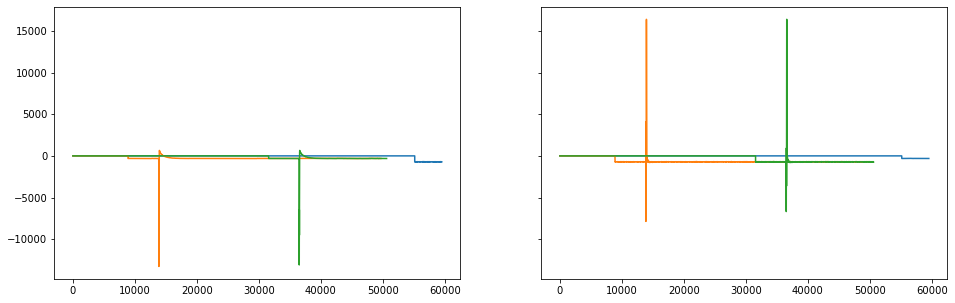

In [9]:
samples_pre = 5000
trig_level = 1000
fig,ax = plt.subplots(figsize=(16,5), ncols=2, nrows=1, sharey=True, facecolor='white')
for x in range(3):  
    count = 0
    while True:  
        red_mca.acq_scope(dec=dec, trig_chan=chan, trig_slope=0, trig_mode=0, trig_level=trig_level, samples_pre=samples_pre, samples_total=length, wait=.2) 
        time.sleep(1)   
        data = red_mca._socket.recv(length*nbytes*2)
        converted_data = []
        for i in range(int(len(data)/nbytes)):
            converted_data.append(int.from_bytes(data[(i*nbytes):((i+1)*nbytes)], byteorder='little', signed=True))
        count += 1
        if np.mean(converted_data) != 0:
            print(x,len(converted_data), np.mean(converted_data), count)
            ax[0].plot(converted_data[0::2])
            ax[1].plot(converted_data[1::2])
            break
# ax[0].set_xlim(samples_pre,samples_pre+2000)
# ax[1].set_xlim(samples_pre,samples_pre+2000)
# ax[0].set_ylim(-600,10)
# ax[1].set_ylim(-600,10)
plt.show()

In [7]:
# ssh.exec_command('reboot')
# red_mca.stop_mca()
# red_mca.close()